In [18]:
import pandas as pd
import igraph as ig
from ipysigma import Sigma
import glob
import json
import numpy as np
from collections import Counter
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Comparison on three iteration

In [19]:
edgelist_incel = pd.DataFrame(columns=['forward_from','forward_to','count','iteration'])
for path in glob.glob('./incel*/*_edgelist/*edgelist*.csv'):
    df = pd.read_csv(path)
    if 'first' in path:
        c = 1
    elif 'second' in path:
        c = 2
    elif 'third' in path:
        c = 3
    df['iteration'] = [c]*len(df)
    edgelist_incel = pd.concat([edgelist_incel,df])

In [20]:
edgelist_incel['link'] = ['incel']*len(edgelist_incel)

In [21]:
edgelist_right = pd.DataFrame(columns=['forward_from','forward_to','count'])
for path in glob.glob('./*right*/*_edgelist/*edgelist*.csv'):
    df = pd.read_csv(path)
    if 'first' in path:
        c = 1
    elif 'second' in path:
        c = 2
    elif 'third' in path:
        c = 3
    df['iteration'] = [c]*len(df)
    edgelist_right = pd.concat([edgelist_right,df])

In [22]:
edgelist_right['link'] = ['right']*len(edgelist_right)

In [23]:
edgelist_left = pd.DataFrame(columns=['forward_from','forward_to','count'])
for path in glob.glob('./*left*/*_edgelist/*edgelist*.csv'):
    df = pd.read_csv(path)
    if 'first' in path:
        c = 1
    elif 'second' in path:
        c = 2
    elif 'third' in path:
        c = 3
    df['iteration'] = [c]*len(df)
    edgelist_left = pd.concat([edgelist_left,df])

In [24]:
edgelist_left['link'] = ['left']*len(edgelist_left)

In [25]:
edgelist = pd.concat([edgelist_incel, edgelist_left, edgelist_right])

In [26]:
len(np.unique(df[['forward_from','forward_to']].values.flatten()))

576

In [27]:
data_total = []
for iteration in range(1,4):
    row = [iteration]
    for category in ['incel','right','left']:
        df = edgelist[(edgelist['link']==category) & (edgelist['iteration']<=iteration)]
        n_nodes = len(np.unique(df[['forward_from','forward_to']].values.flatten()))
        row.append(n_nodes)
    data_total.append(row)

In [28]:
df_count = pd.DataFrame(data= data_total, columns=['iteration','incel','far-right','far-left'])

In [29]:
df_count = df_count.rename(columns={'iteration':'Iteration'})

In [30]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=12)
rc('font', family='Times New Roman')
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

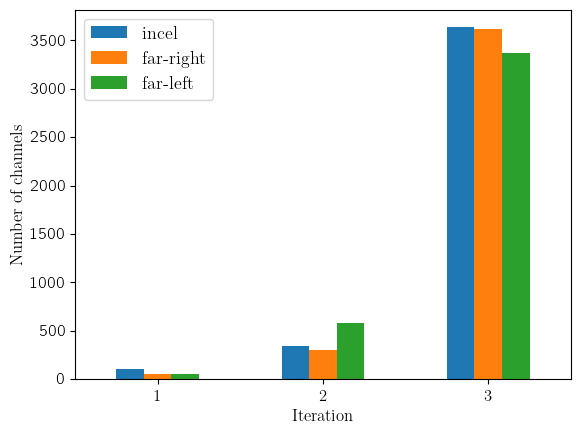

In [31]:
df_count.plot(x='Iteration',
              kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Number of channels')
plt.savefig('../report_latex/img/n_nodes_output.png', dpi=300)

In [53]:
pd.Series((df_count.iloc[2,1:] - df_count.iloc[2,1:].mean()) / df_count.iloc[2,1:].std(ddof=1))
#z-scores

incel        0.643037
far-right    0.509071
far-left    -1.152107
Name: 2, dtype: float64